In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

In [3]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
import pandas as pd

In [4]:
df = pd.read_csv('video_games_sales.csv')
df[df['User_Score'] == 'tbd'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2425 entries, 119 to 16710
Data columns (total 16 columns):
Name               2425 non-null object
Platform           2425 non-null object
Year_of_Release    2377 non-null float64
Genre              2425 non-null object
Publisher          2423 non-null object
NA_Sales           2425 non-null float64
EU_Sales           2425 non-null float64
JP_Sales           2425 non-null float64
Other_Sales        2425 non-null float64
Global_Sales       2425 non-null float64
Critic_Score       1082 non-null float64
Critic_Count       1082 non-null float64
User_Score         2425 non-null object
User_Count         0 non-null float64
Developer          2403 non-null object
Rating             2375 non-null object
dtypes: float64(9), object(7)
memory usage: 322.1+ KB


In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [6]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

In [7]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


In [8]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df['Year_of_Release'].value_counts()

2008    592
2007    590
2005    562
2009    550
2006    528
2003    498
2004    476
2002    455
2011    453
2010    429
2012    313
2013    266
2001    256
2014    253
2016    212
2015    211
2000    102
1999     30
1998     25
1997     13
1996      7
1985      1
1994      1
1992      1
1988      1
Name: Year_of_Release, dtype: int64

In [9]:
sales_df.groupby('Year_of_Release').sum().head(30)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1985,0.00,0.03,0.00,0.01,0.03
1988,0.00,0.02,0.00,0.01,0.03
1992,0.02,0.00,0.00,0.00,0.03
1994,0.39,0.26,0.53,0.08,1.27
1996,7.91,6.88,4.06,1.24,20.10
1997,15.34,8.67,9.01,2.02,35.01
1998,18.13,12.13,10.81,2.14,43.18
1999,23.32,15.69,9.67,2.45,51.17
2000,39.34,25.20,11.27,5.49,81.24


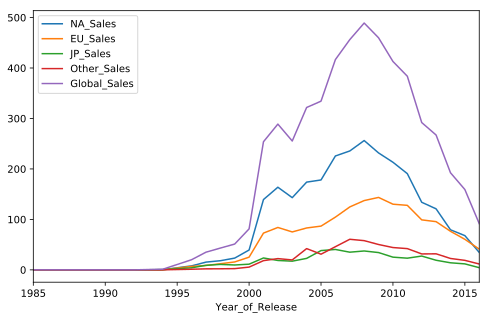

In [10]:
sales_df.groupby('Year_of_Release').sum().plot()

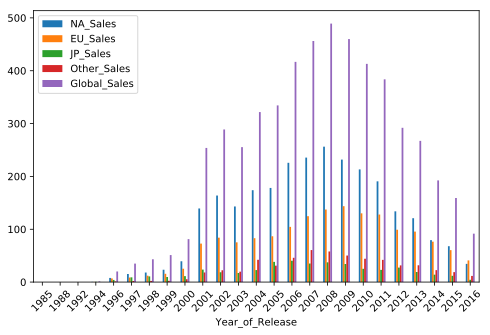

In [11]:
sales_df.groupby('Year_of_Release').sum().plot(kind = 'bar', rot = 45)

In [12]:
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
cols

['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

In [15]:
#sns_plot = sns.pairplot(df[cols])

In [14]:
sns_plot.savefig('pairplot.png')

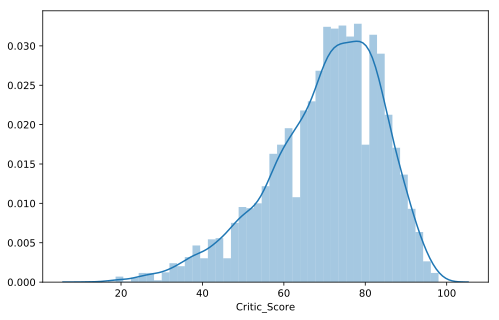

In [16]:
sns.distplot(df['Critic_Score'])

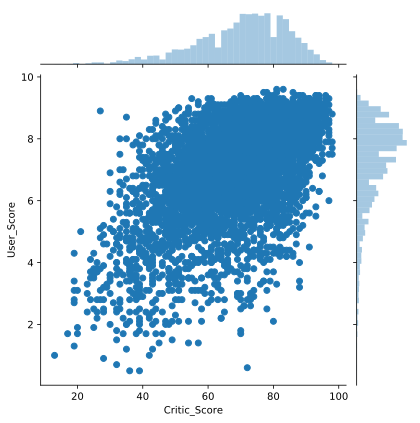

In [17]:
sns.jointplot(df['Critic_Score'], df['User_Score'])